In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
cups_df = pd.read_csv("WorldCups.csv")
players_df = pd.read_csv("WorldCupPlayers.csv")
matches_df = pd.read_csv("WorldCupMatches.csv")
#cups_df['Attendance'] = cups_df['Attendance'].str.replace('.', '').astype('int64')
cups_df.head()

C:\Users\cmani\AppData\Local\Temp/ipykernel_20812/4216973272.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cups_df['Attendance'] = cups_df['Attendance'].str.replace('.', '').astype('int64')


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607


**1. Attendance per each cup - LinePlot**

Text(0.5, 1.0, 'Attendance Annual Growth')

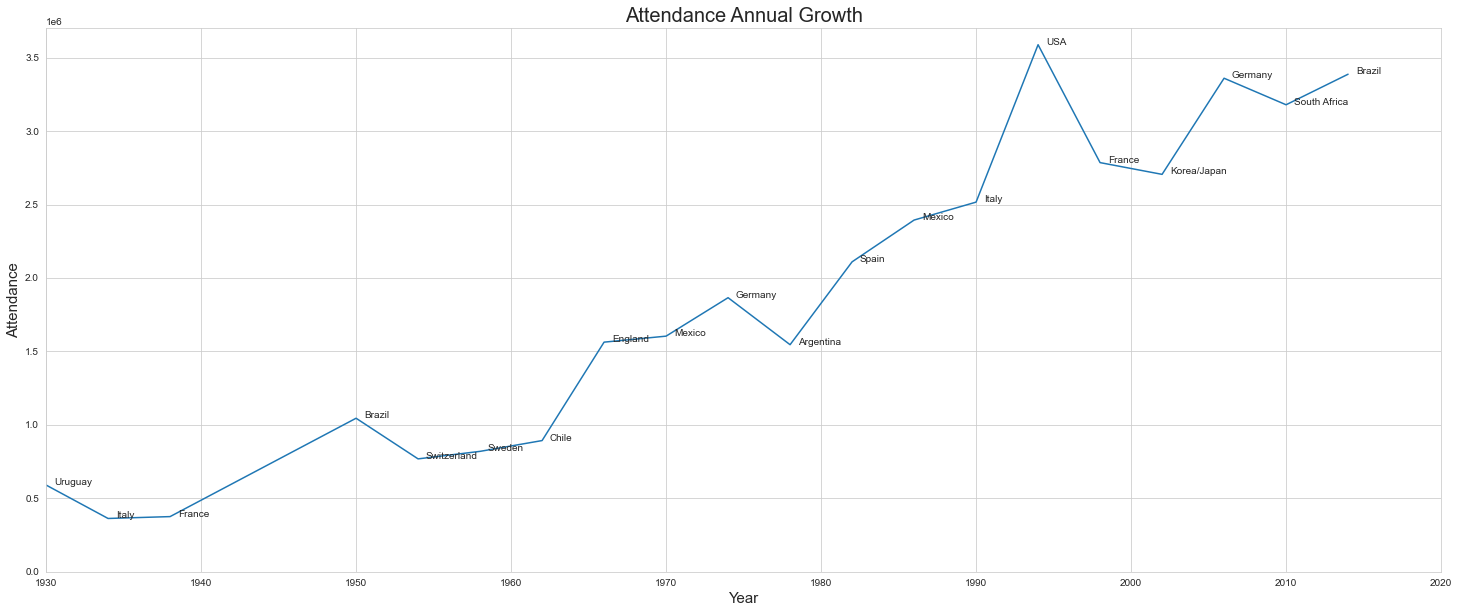

In [67]:
#apy_df = pd.merge(cups_df['Year'], cups_df['Attendance'], right_index = True,left_index = True)
plt.figure(figsize=(25, 10))
#cups_df['Attendance'] = cups_df['Attendance'].str.replace('.','')
plt.plot(cups_df['Year'],cups_df['Attendance'])
#plt.annotate((c for c in cups_df['Country']),((x for x in cups_df['Year']),(y for y in cups_df['Attendance'])))
i=0
for k in cups_df['Country']:
    plt.annotate(k,(cups_df['Year'][i]+0.5,cups_df['Attendance'][i]-0.5))
    i+=1
#print(cups_df['Attendance'].str.replace(".",""))
plt.axis([1930,2020,0,3700000])
plt.xlabel('Year',size = 15)
plt.ylabel('Attendance',size = 15)
plt.title('Attendance Annual Growth',size = 20)

**2. Top-3 Finishes - BarChart**

In [61]:
winners = cups_df["Winner"]
runners = cups_df["Runners-Up"]
third = cups_df["Third"]
countries = pd.concat([winners,runners,third]).unique()
data = {'Country':list(countries),
        'Wins':[],
        '2nd':[],
        '3rd':[]}
#print(countries)
for country in countries:
    wins = 0
    runs = 0
    thirds = 0
    for i in winners:
        if(i==country):
            wins+=1
    for i in runners:
        if(i==country):
            runs+=1
    for i in third:
        if(i==country):
            thirds+=1
    data['Wins'].append(wins)
    data['2nd'].append(runs)
    data['3rd'].append(thirds)
countries = pd.DataFrame(data)
print(countries)

# x = countries
# #plt.xticks(x,countries)
# plt.bar(x,5)
# plt.show()

           Country  Wins  2nd  3rd
0          Uruguay     2    0    0
1            Italy     4    2    1
2       Germany FR     3    3    1
3           Brazil     5    2    2
4          England     1    0    0
5        Argentina     2    3    0
6           France     1    1    2
7            Spain     1    0    0
8          Germany     1    1    3
9   Czechoslovakia     0    2    0
10         Hungary     0    2    0
11          Sweden     0    1    2
12     Netherlands     0    3    1
13             USA     0    0    1
14         Austria     0    0    1
15           Chile     0    0    1
16        Portugal     0    0    1
17          Poland     0    0    2
18         Croatia     0    0    1
19          Turkey     0    0    1


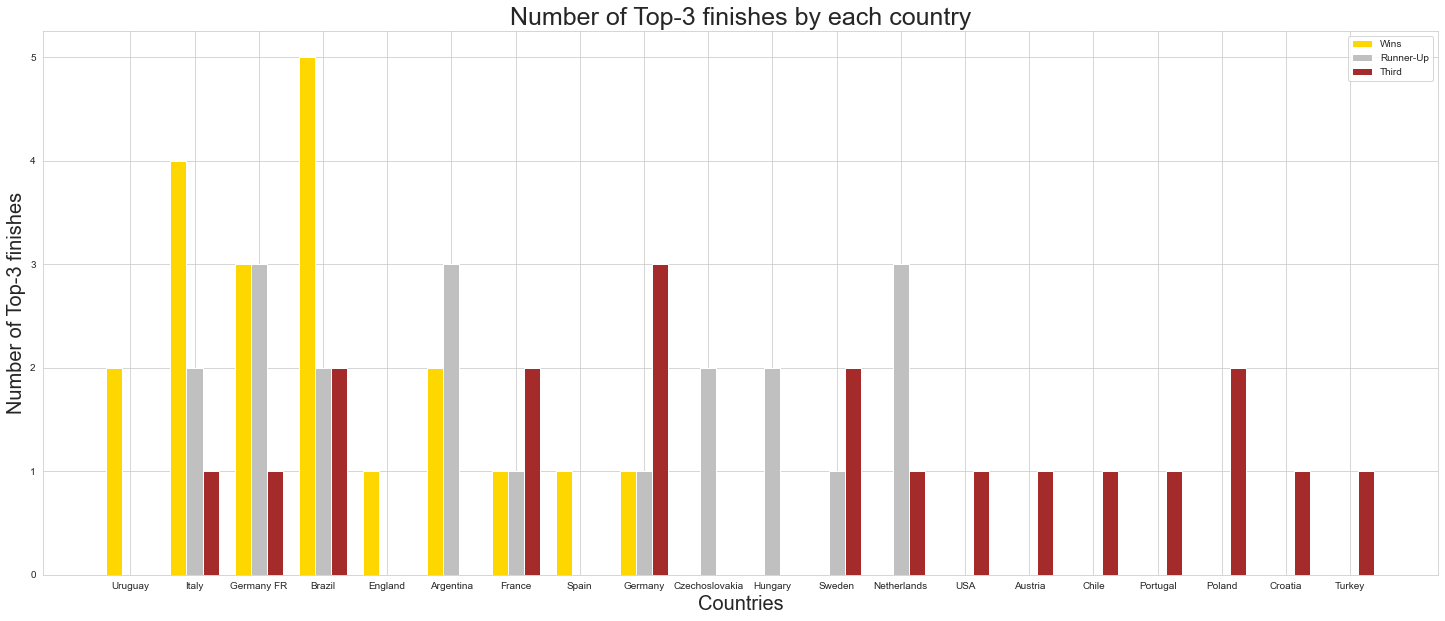

In [62]:
plt.figure(figsize=(25, 10))

# x = np.arange(20)
# #plt.xticks(x,countries['Country'])
# plt.figure(figsize=(25, 10))

# p1 = plt.bar(countries['Country'],countries['Wins'],color='gold',alpha=1,label="Winners")
# p2 = plt.bar(countries['Country'],countries['2nd'],color='silver',alpha=0.7,label="Runner-Up")
# p3 = plt.plot(countries['Country'],countries['3rd'],'o',color='brown',label="Third")

# #plt.legend([p1,p2,p3],["Winners","Runners","Third"])
# plt.legend()
# # hh=[p1,p2,p3]
# # plt.legend([p1,p2.patches[0],p3],[H.get_label() for H in hh])

N = 20
ind = np.arange(N) 
width = 0.25
  
xvals = countries['Wins']
bar1 = plt.bar(ind, xvals, width, color = 'Gold')
  
yvals = countries['2nd']
bar2 = plt.bar(ind+width, yvals, width, color='Silver')
  
zvals = countries['3rd']
bar3 = plt.bar(ind+width*2, zvals, width, color = 'Brown')
  
plt.xlabel('Countries',size = 20)
plt.ylabel('Number of Top-3 finishes',size = 20)
plt.title('Number of Top-3 finishes by each country',size = 25)
  
plt.xticks(ind+width,countries['Country'])
plt.legend( (bar1, bar2, bar3), ('Wins', 'Runner-Up', 'Third') )
plt.show()

**3. Per Cup Stats - SubPlots, BarPlots**

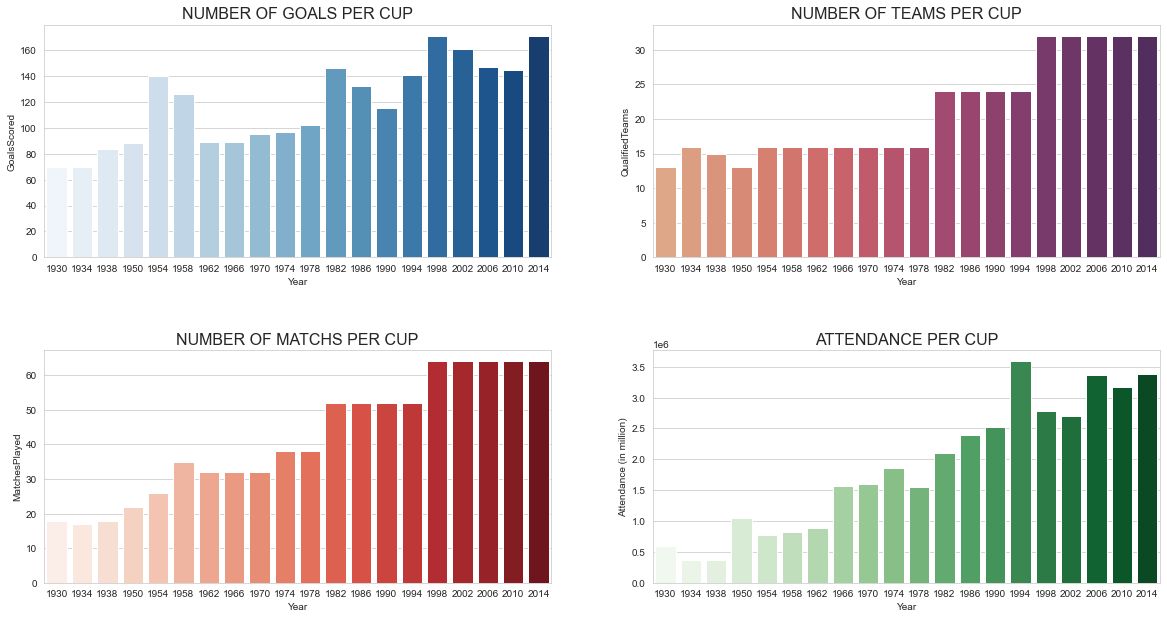

In [63]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")

plt.subplot(221)
ax = sns.barplot(x="Year", y="GoalsScored", data=cups_df, palette="Blues")
ax.set_title("NUMBER OF GOALS PER CUP", fontsize=16)

plt.subplot(222)
ax = sns.barplot(x="Year", y="QualifiedTeams", data=cups_df, palette="flare")
ax.set_title("NUMBER OF TEAMS PER CUP", fontsize=16)

plt.subplot(223)
ax = sns.barplot(x="Year", y="MatchesPlayed", data=cups_df, palette="Reds")
ax.set_title("NUMBER OF MATCHS PER CUP", fontsize=16)

plt.subplot(224)
ax = sns.barplot(x="Year", y="Attendance", data=cups_df, palette="Greens")
ax.set_title("ATTENDANCE PER CUP", fontsize=16)
ax.set(ylabel='Attendance (in million)')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

**4. Goals scored each year by each country - HeatMap**

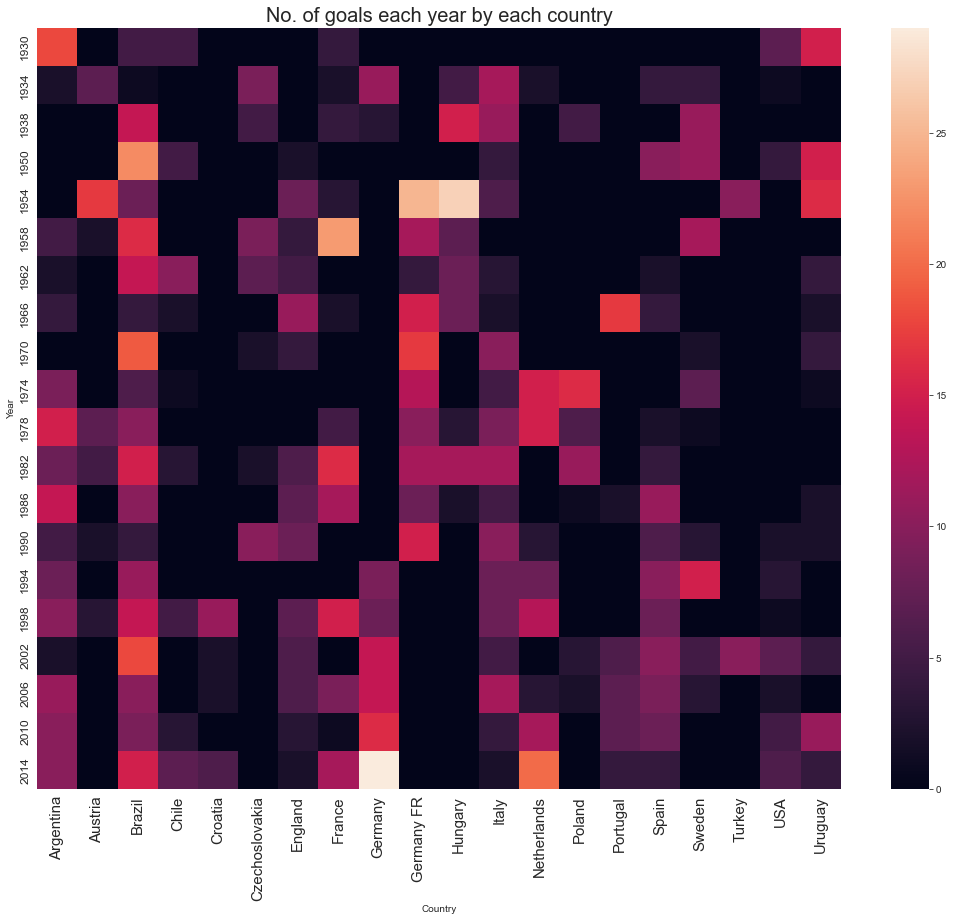

In [64]:
data = {
    'Year':[],
    'Country':[],
    'Goals':[]
}
y14 = []
mylabels = []
for y in cups_df['Year']:
    for c in countries['Country']:
        mt = matches_df[matches_df['Year']==y]
        ct = mt[mt['Home Team Name']==c]['Home Team Goals']
        df = pd.DataFrame(ct.append(mt[mt['Away Team Name']==c]['Away Team Goals'], ignore_index = True))
        tg = sum(df[0])
        data['Goals'].append(tg)
        data['Country'].append(c)
        data['Year'].append(y)
        if y==2014 and tg != 0:
            y14.append(tg)
            mylabels.append(c)
gls_df = pd.DataFrame(data)
#gls_df
gls_df = gls_df.pivot("Year", "Country", "Goals")
plt.figure(figsize = (18,14))
plt.title("No. of goals each year by each country",size = 20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
fig = sns.heatmap(gls_df)

#     sum(matches_df['Home Team Name']==c)

**5. Goals scored by each country in FIFA 2014 - PieChart**

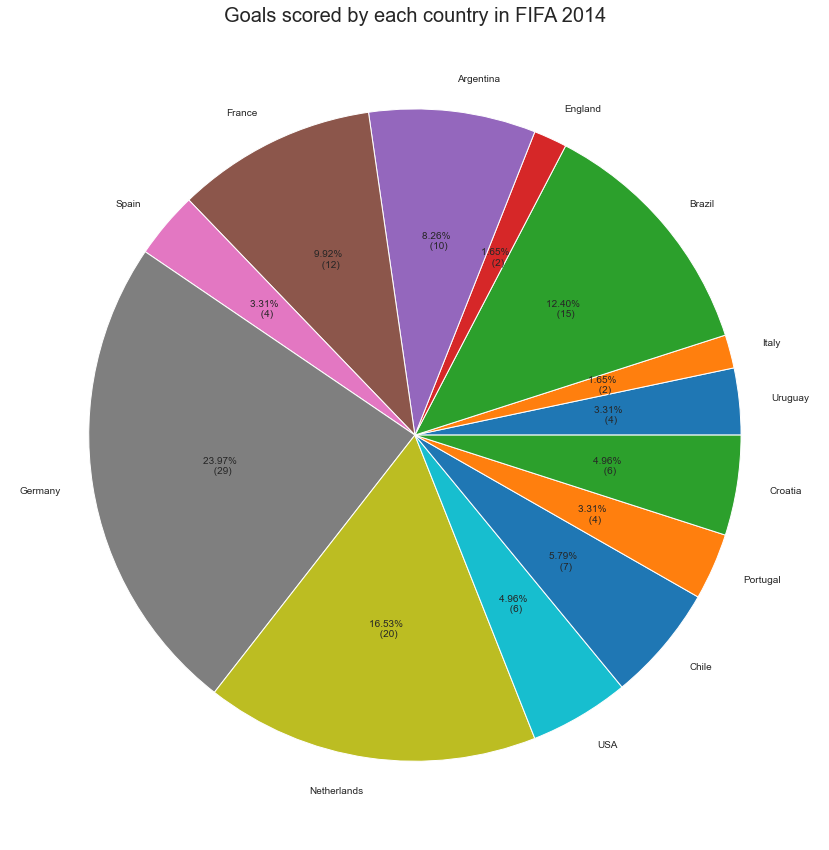

In [65]:
#y = np.array([35, 25, 25, 15])
#mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
plt.figure(figsize=(20,15))
# for i in range(len(y14)):
#     # if y14[i]==0:
#     #     del y14[i]
#     #     del mylabels[i]
#     print(y14[i])
# y14_df = pd.DataFrame({'Country':mylabels,'Goals':y14})
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}% \n ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(y14, labels = mylabels,autopct=make_autopct(y14))
plt.title("Goals scored by each country in FIFA 2014",size = 20)
# print(y14_df)
plt.show()